In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(67)

n = 50
x0 = np.random.randn(n, 2) + np.array([-2,-2])
x1 = np.random.randn(n, 2) + np.array([2, 2])

x = np.vstack([x0, x1])
y = np.array([0]*n + [1]*n)

x_bias = np.hstack([x, np.ones((x.shape[0], 1))])

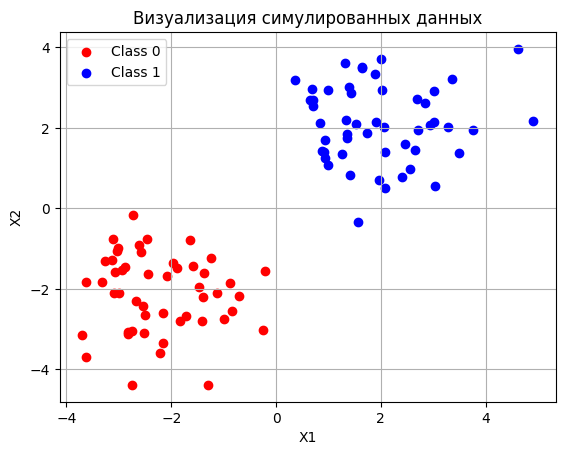

In [18]:
plt.scatter(x0[:,0], x0[:,1], color='red', label='Class 0')   
plt.scatter(x1[:,0], x1[:,1], color='blue', label='Class 1')  

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Визуализация симулированных данных')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x, theta):
    return sigmoid(x @ theta)

def log_like(x, y, theta):
    p = predict(x, theta)
    res = np.sum(y * np.log(p) + (1 - y) * np.log(1-p))
    print(res)
    return res

In [20]:
def gradient_descent(x, y, lr=0.1, epochs = 50):
    theta = np.zeros(x.shape[1])
    theta_history = [theta.copy()]

    for _ in range(epochs):
        p = predict(x, theta)
        grad = x.T @ (p - y)  
        theta -= lr * grad
        theta_history.append(theta.copy())
    
    return theta, np.array(theta_history)

In [21]:
def natural_gradient_descent(x, y, lr=0.1, epochs=50):
    theta = np.zeros(x.shape[1])
    theta_history = [theta.copy()]
    
    for _ in range(epochs):
        p = predict(x, theta)
        grad = x.T @ (p - y)
        W = np.diag(p * (1 - p))
        F_inv = np.linalg.pinv(x.T @ W @ x)  
        theta -= lr * (F_inv @ grad)
        theta_history.append(theta.copy())
        
    return theta, np.array(theta_history)

In [22]:
theta_gd, hist_gd = gradient_descent(x_bias, y)
theta_ng, hist_ng = natural_gradient_descent(x_bias, y)

Вероятность принадлежности к классу 1: 1.000
Предсказанный класс: 1


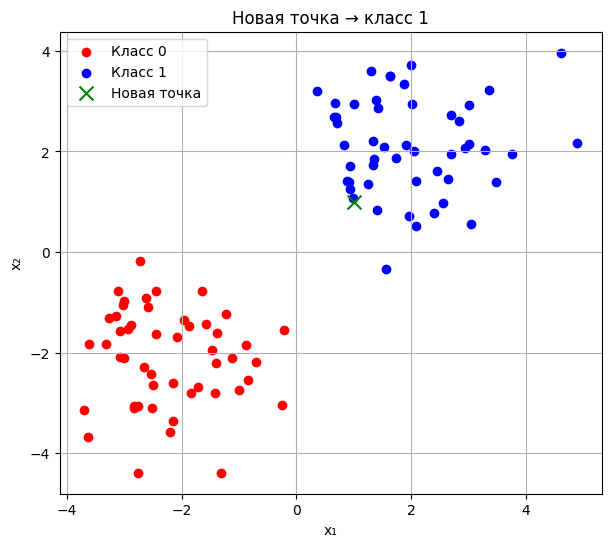

Вероятность принадлежности к классу 1: 0.500
Предсказанный класс: 1


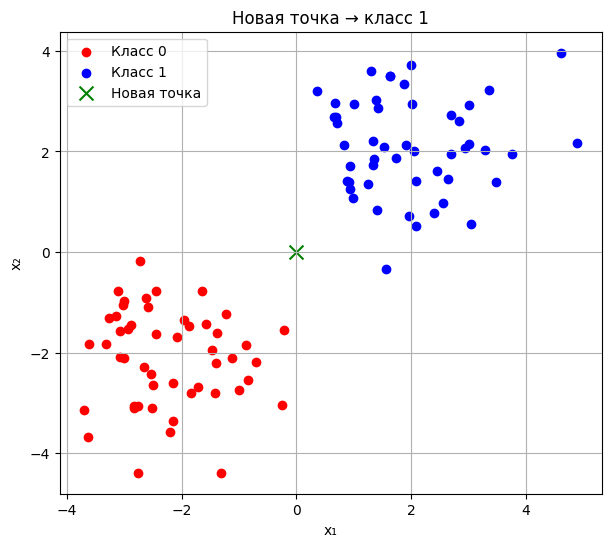

Вероятность принадлежности к классу 1: 0.741
Предсказанный класс: 1


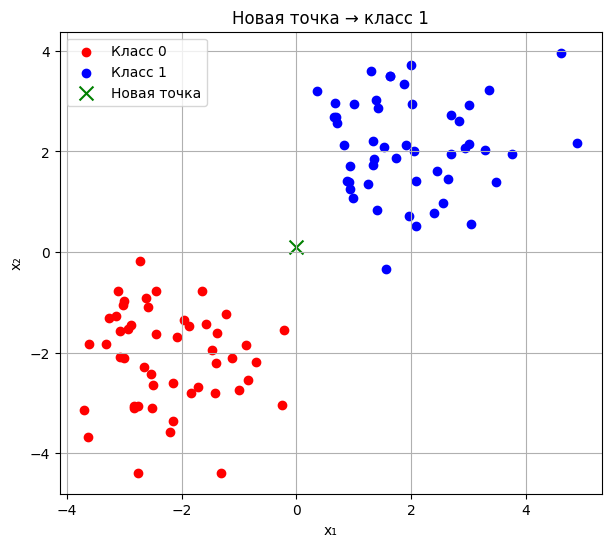

Вероятность принадлежности к классу 1: 0.109
Предсказанный класс: 0


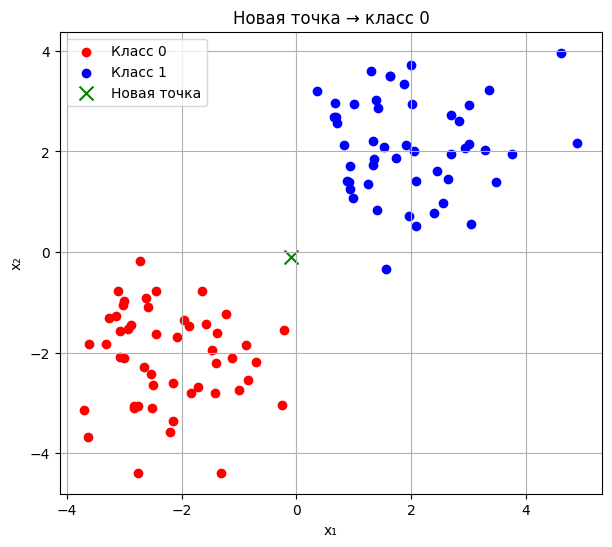

In [23]:
while True:
    user_input = input("\nВведите координаты (x1 x2), или 'q' для выхода: ")
    if user_input.lower() == 'q':
        break

    try:
        x1_new, x2_new = map(float, user_input.split())
        x_new = np.array([x1_new, x2_new, 1.0])  
        prob = predict(x_new, theta_gd)
        print(f"Вероятность принадлежности к классу 1: {prob:.3f}")
        print(f"Предсказанный класс: {'1' if prob >= 0.5 else '0'}")

        plt.figure(figsize=(7, 6))
        plt.scatter(x0[:, 0], x0[:, 1], color='red', label='Класс 0')
        plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Класс 1')
        #plt.plot(x_line, y_line, 'k--', label='Граница решений')
        plt.scatter(x1_new, x2_new, color='green', s=100, marker='x', label='Новая точка')
        plt.legend()
        plt.grid(True)
        plt.title(f"Новая точка → класс {'1' if prob >= 0.5 else '0'}")
        plt.xlabel("x₁")
        plt.ylabel("x₂")
        plt.show()

    except ValueError:
        print("Ошибка: введите два числа, например '0.5 1.2'")